**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [8]:
TXT_FNAME_ANNOT = "region.annotation.encode_e2g_benchmark.score.merge.tsv"

**View files**

In [9]:
#txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.score.merge.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.encode_e2g_benchmark.score.merge.tsv 


## Import data

**Read region annotation**

In [10]:
### set file name
txt_fname = TXT_FNAME_ANNOT

### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 3035    9

$fcc_astarr_macs_input_union
[1] 3169    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
chr1,3774056,3776283,chr1:3774056-3776283,-5.9011920,0.0000000,-7.667223,3,CEP104:3|LRRC47:3|SMIM1:3
chr1,3803955,3806146,chr1:3803955-3806146,0.3625040,0.5876462,0.000000,2,LRRC47:2|SMIM1:2
chr1,4126841,4128109,chr1:4126841-4128109,0.5496118,0.5496118,0.000000,1,SMIM1:1


## Arrange table

In [11]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(Score = Mean)
    return(dat)
})

### assign and show
lst_dat_region_annot_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 3035   10

$fcc_astarr_macs_input_union
[1] 3169   10



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note,Score
chr1,3774056,3776283,chr1:3774056-3776283,-5.9011920,0.0000000,-7.667223,3,CEP104:3|LRRC47:3|SMIM1:3,-5.9011920
chr1,3803955,3806146,chr1:3803955-3806146,0.3625040,0.5876462,0.000000,2,LRRC47:2|SMIM1:2,0.3625040
chr1,4126841,4128109,chr1:4126841-4128109,0.5496118,0.5496118,0.000000,1,SMIM1:1,0.5496118


## Explore: Score distribution

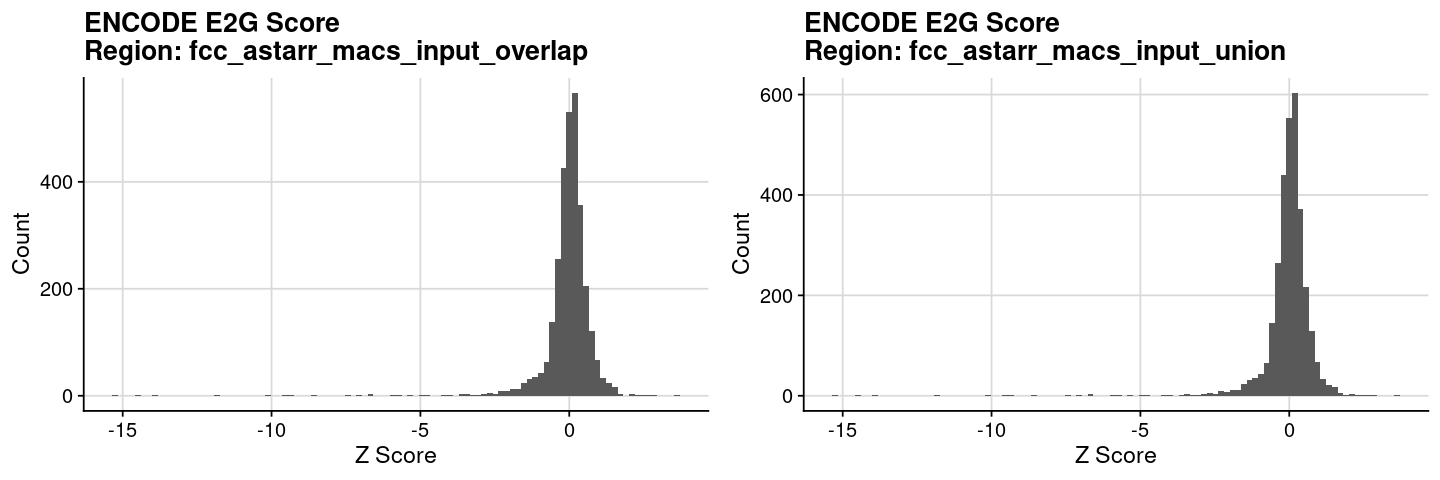

In [12]:
lst = lst_dat_region_annot_arrange
lst = lapply(names(lst), function(idx){
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", idx)
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Score)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Z Score", y = "Count", title = txt)
    return(gpt)
})
options(repr.plot.height=4, repr.plot.width=12)
plot_grid(plotlist = lst, nrow=1)

## Export plot

**Set plot style**

In [13]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16)
)

**Generate plot**

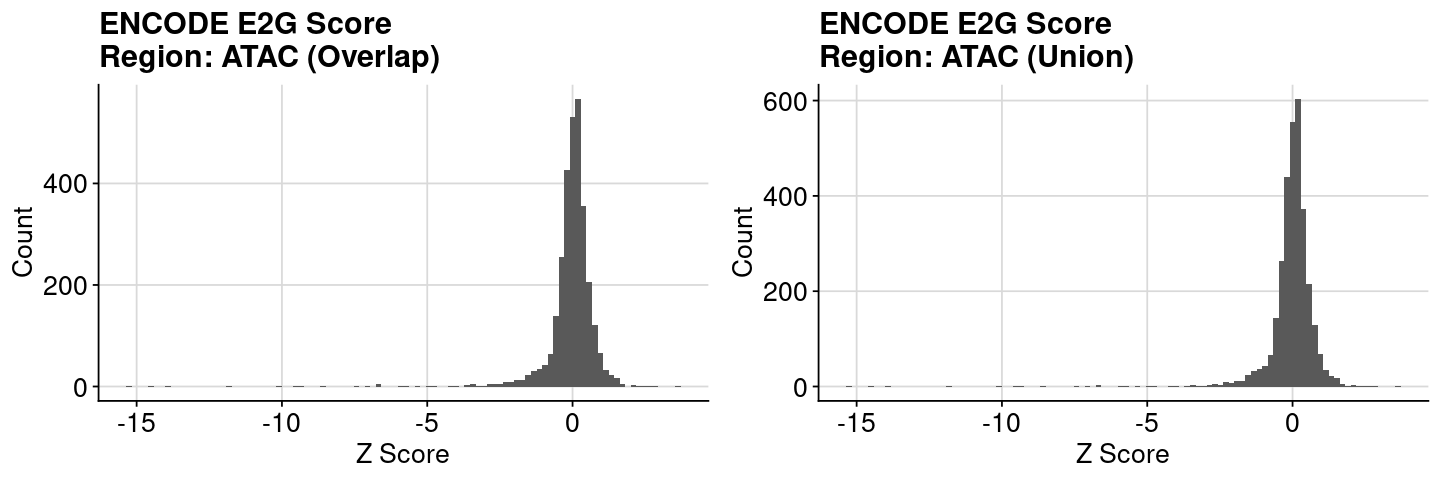

In [15]:
lst = lst_dat_region_annot_arrange
lst = lapply(names(lst), function(idx){
    ### set title
    txt = fun_str_map_atac(idx)
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", txt)

    ### get table
    dat = lst[[idx]]

    ### generate plot
    gpt = ggplot(dat, aes(x=Score)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Z Score", y = "Count", title = txt) +
        theme_text
    return(gpt)
})

plt = plot_grid(plotlist = lst, nrow=1)

### assign and show
plt_export_score = plt
options(repr.plot.height=4, repr.plot.width=12)
print(plt)

**Save plot**

In [16]:
plt_export = plt_export_score
txt_export = "fig.region_annot.astarr_input_overlap_union.encode_e2g_benchmakr.distribution.score"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 12, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 12, units = "in")